In [3]:
#ddir = '../opt tweez data/10_04_2014/' # Moving tweezers
ddir = '../opt tweez data/02_12_2014/2_12_2014_part3/' # Pretty good
#ddir = '../opt tweez data/06_03_2014/'
files = list.files(ddir)
files

[1] "b3um_I1000mA_t50us_fs10kHz.txt" "b3um_I1000mA_t50us_fs12kHz.txt"
[3] "b3um_I1000mA_t50us_fs15kHz.txt" "b3um_I1000mA_t50us_fs17kHz.txt"
[5] "b3um_I1000mA_t50us_fs5kHz.txt"  "b3um_I1000mA_t50us_fs7kHz.txt"

In [54]:
fn = 5 #length(files)
data1 = read.table(paste(ddir,files[fn],sep=''),sep =';',dec = ',')
files[fn]
data1[1:3,]
length(data1[,1])
#tsdata1 = ts(data1[,2:3]) # line numbers, etc. present
tsdata1 = ts(data1[,1:2]) # just coordinates
#plot(tsdata1)
nsamples = length(tsdata1[,1])
#plot(tsdata1[1:nsamples/3,1],tsdata1[1:nsamples/3,2],type='l', col = 'red')
#lines(tsdata1[(nsamples/3+1):(2*nsamples/3),1],tsdata1[(nsamples/3+1):(2*nsamples/3),2],col='purple')
#lines(tsdata1[(2*nsamples/3+1):nsamples,1],tsdata1[(2*nsamples/3+1):nsamples,2],col='blue')

data1 = tsdata1
postscript('img/trajectory.eps')
par(cex=2)
plot(data1[,1], data1[,2], type='l', asp = 1)
dev.off()

plotidx = 1:2000
postscript('img/comparison_2000pts.eps')
layout(matrix(1:2,1:1))
par(cex=2)
plot(data1[plotidx,1], data1[plotidx,2], type='l', asp=1, axes=FALSE, ann = FALSE)
plot(rnorm(2000), rnorm(2000), type='l', asp=1, axes=FALSE, ann=FALSE)
dev.off()

[1] "b3um_I1000mA_t50us_fs5kHz.txt"

,V1,V2
1,8.167,6.533
2,8.155,6.648
3,8.104,6.621


[1] 100000

png 
  2

png 
  2

In [5]:
meanx = mean(tsdata1[,1])
meany = mean(tsdata1[,2])
centeredx = tsdata1[,1]-meanx
centeredy = tsdata1[,2]-meany
pcoords = cbind(sqrt(centeredx^2 + centeredy^2), atan2(centeredx,centeredy))
pcoords[1:3,]

sqrt(centeredx^2 + centeredy^2),"atan2(centeredx, centeredy)"
0.1711126,2.5799788
0.08456232,1.93130247
0.06340865,2.68200850


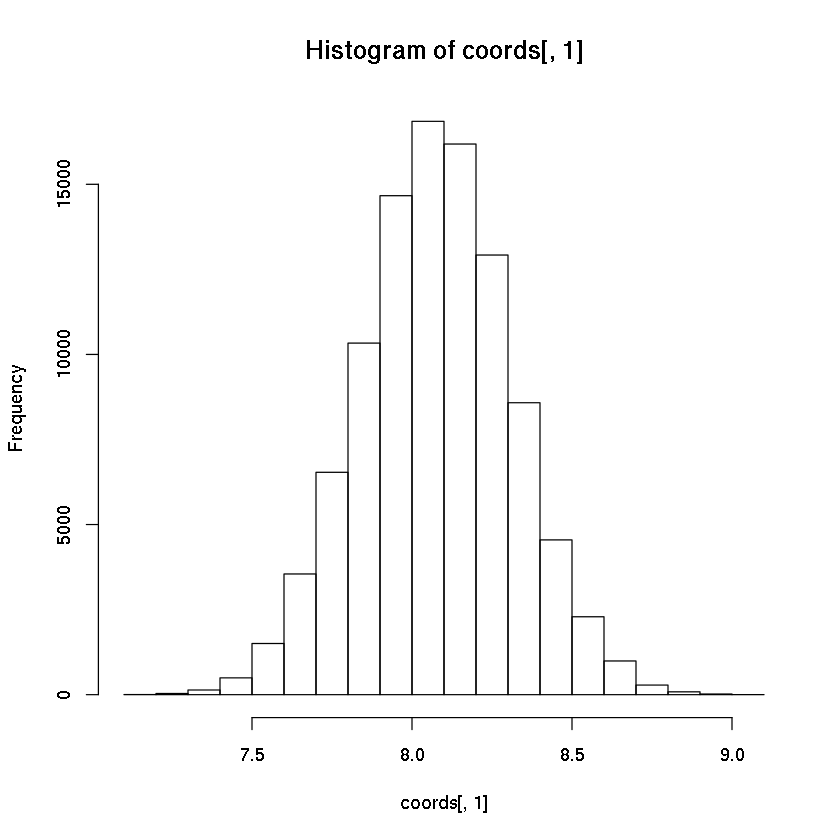

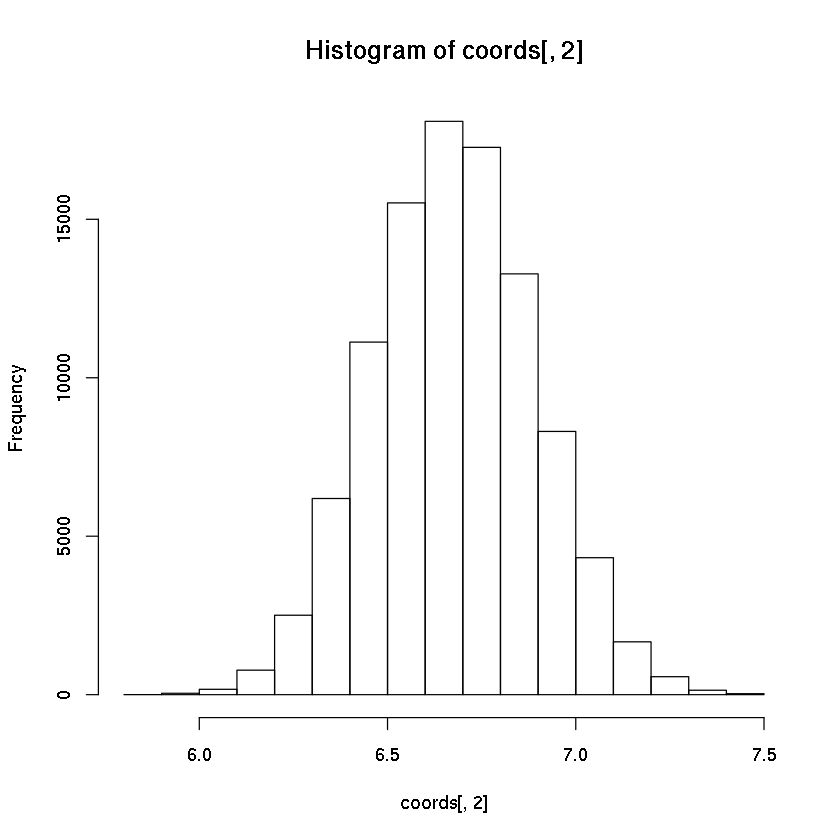

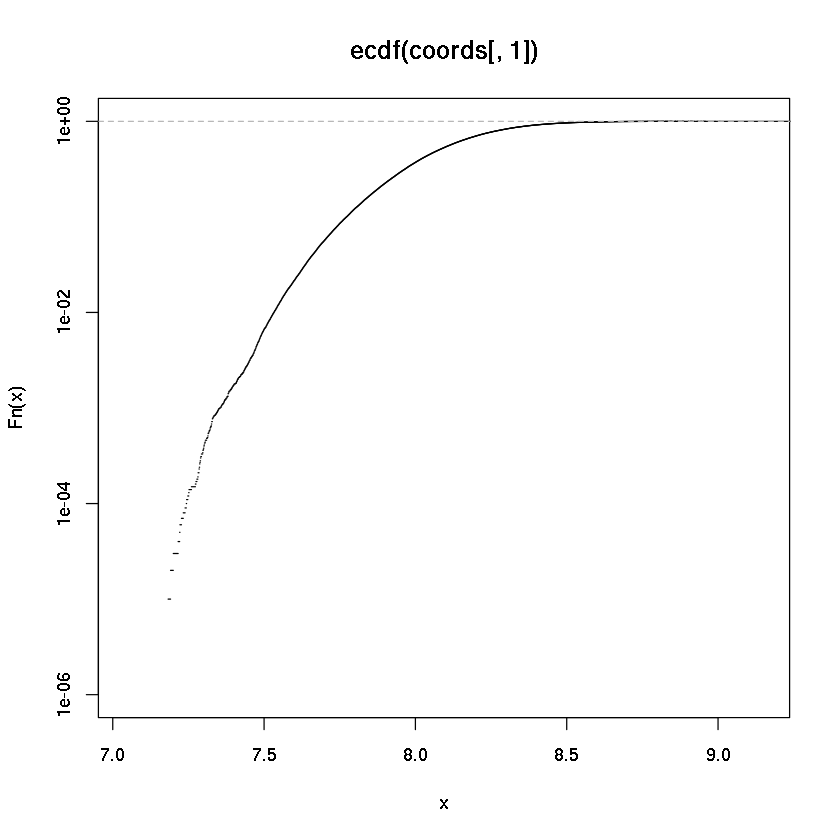

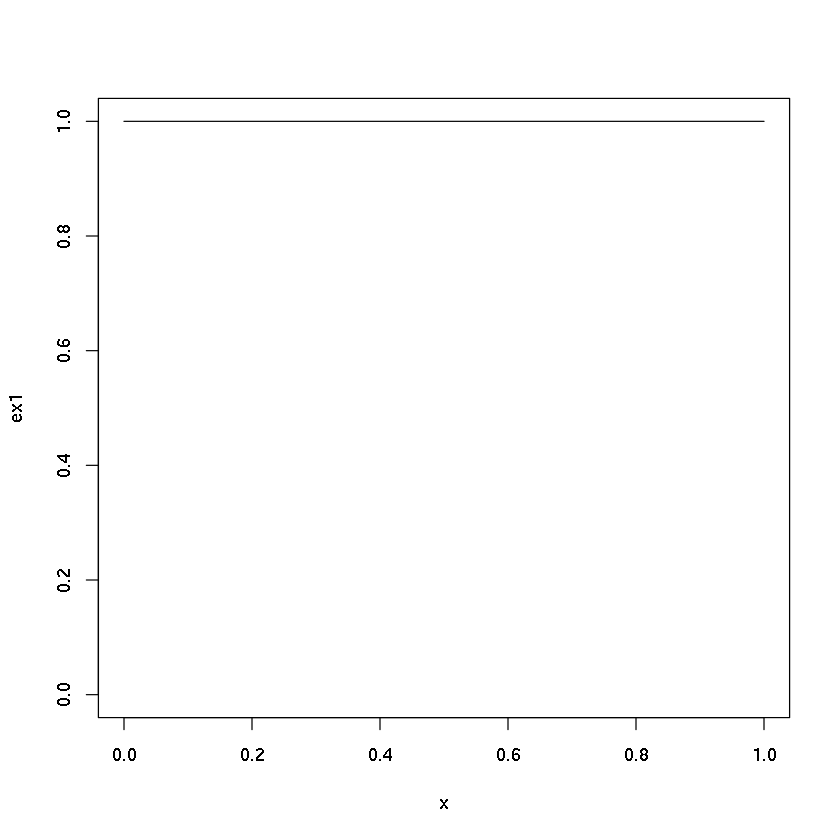

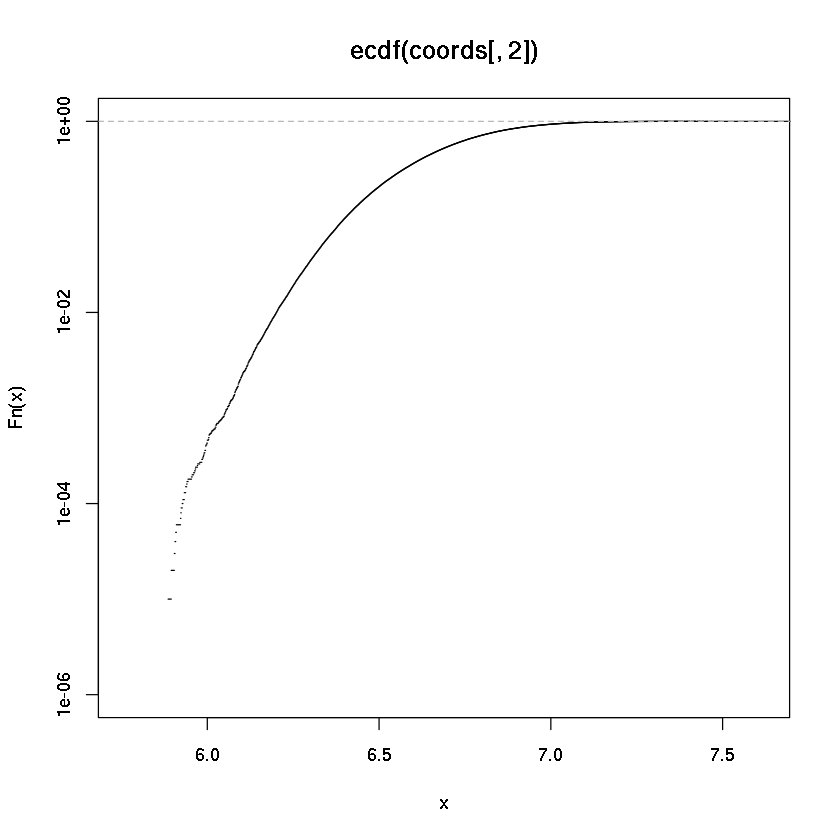

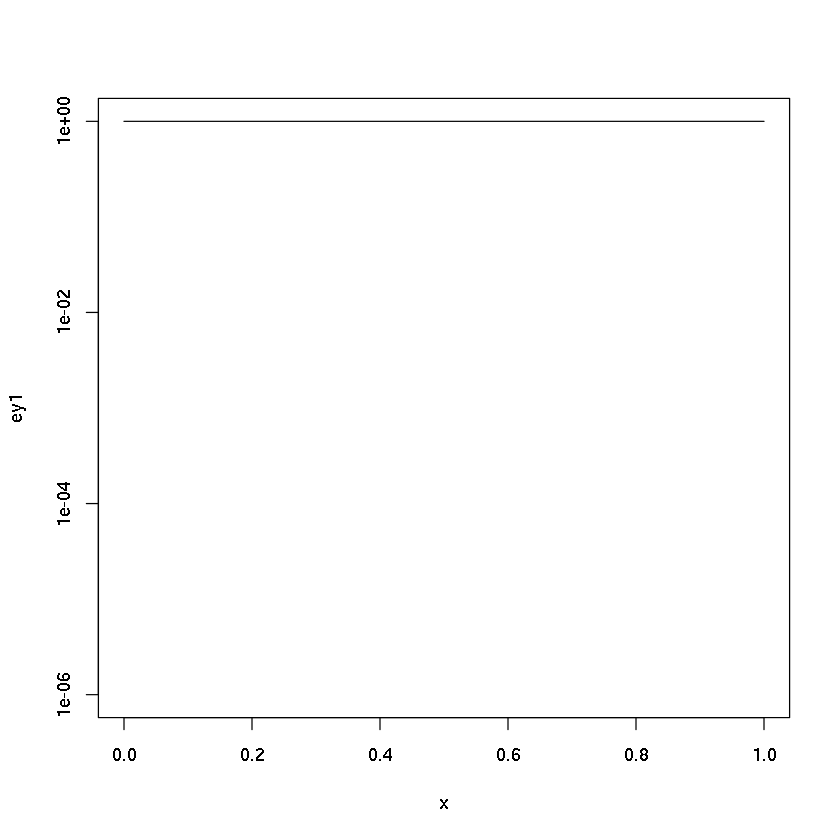

In [6]:
coords = tsdata1
#coords = pcoords

hist(coords[,1])
hist(coords[,2])

ex = ecdf(coords[,1])
ey = ecdf(coords[,2])
ex1 <- function(x) 1-ex(x)
ey1 <- function(x) 1-ey(x)
    
plot(ex,log='y',ylim = c(0.000001,1))
plot(ex1,ylim = c(0.000001,1))
plot(ey,log='y',ylim = c(0.000001,1))
plot(ey1,log='y',ylim = c(0.000001,1))

In [22]:
dnsx = density(coords[,1])
dnsy = density(coords[,2])

postscript('img/densities_xy.eps')
layout(matrix(1:2, 1:1))
plot(dnsx, lwd = 2)
lines(dnsx$x,dnorm(dnsx$x,mean = mean(coords[,1]),sd = sd(coords[,1])),col='red', lwd = 2)
plot(dnsy, lwd = 2)
lines(dnsy$x,dnorm(dnsy$x,mean = mean(coords[,2]),sd = sd(coords[,2])),col='red', lwd = 2)
dev.off()

png 
  2

In [19]:
?plot

In [13]:
ties <- function(x) 1-length(unique(x))/length(x)
ks.test((coords[,1]-mean(coords[,1]))/sd(coords[,1]),pnorm)
ties(coords[,1])
ks.test((coords[,2]-mean(coords[,2]))/sd(coords[,2]),pnorm)
ties(coords[,2])
shapiro.test((coords[1:5000,1]-mean(coords[1:5000,1]))/sd(coords[1:5000,1]))
shapiro.test((coords[1:5000,2]-mean(coords[1:5000,2]))/sd(coords[1:5000,2]))

Warning message:
In ks.test((coords[, 1] - mean(coords[, 1]))/sd(coords[, 1]), pnorm): ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  (coords[, 1] - mean(coords[, 1]))/sd(coords[, 1])
D = 0.0039561, p-value = 0.08741
alternative hypothesis: two-sided


[1] 0.9844

Warning message:
In ks.test((coords[, 2] - mean(coords[, 2]))/sd(coords[, 2]), pnorm): ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  (coords[, 2] - mean(coords[, 2]))/sd(coords[, 2])
D = 0.0075917, p-value = 1.972e-05
alternative hypothesis: two-sided


[1] 0.98591


	Shapiro-Wilk normality test

data:  (coords[1:5000, 1] - mean(coords[1:5000, 1]))/sd(coords[1:5000,     1])
W = 0.99664, p-value = 3.43e-09



	Shapiro-Wilk normality test

data:  (coords[1:5000, 2] - mean(coords[1:5000, 2]))/sd(coords[1:5000,     2])
W = 0.99114, p-value < 2.2e-16


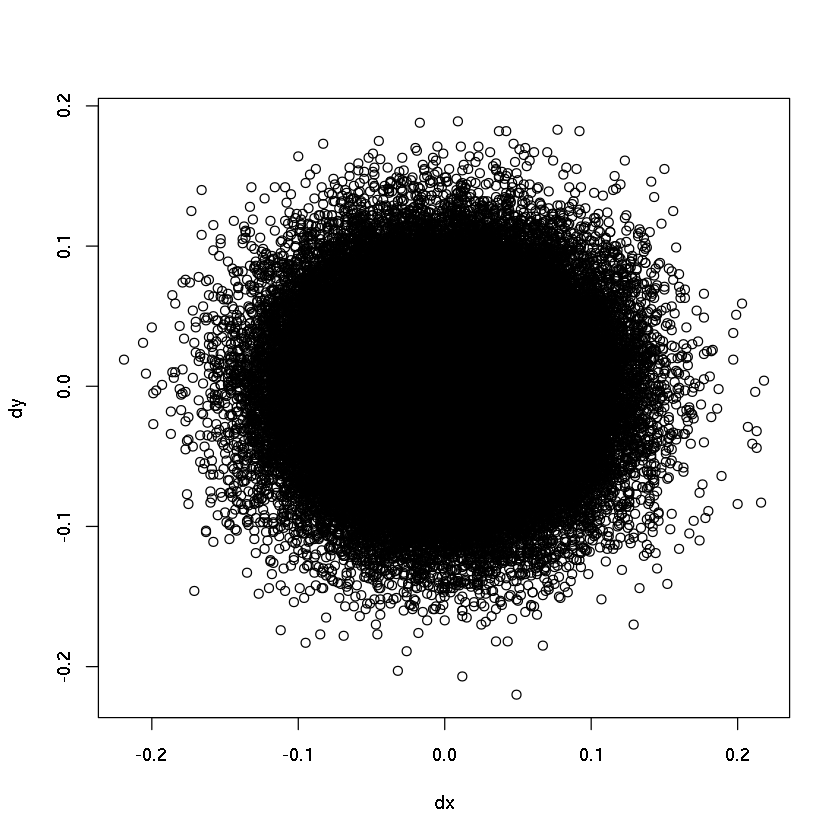

In [9]:
dx = diff(coords[,1],lag = 1)
dy = diff(coords[,2],lag = 1)
plot(dx,dy)

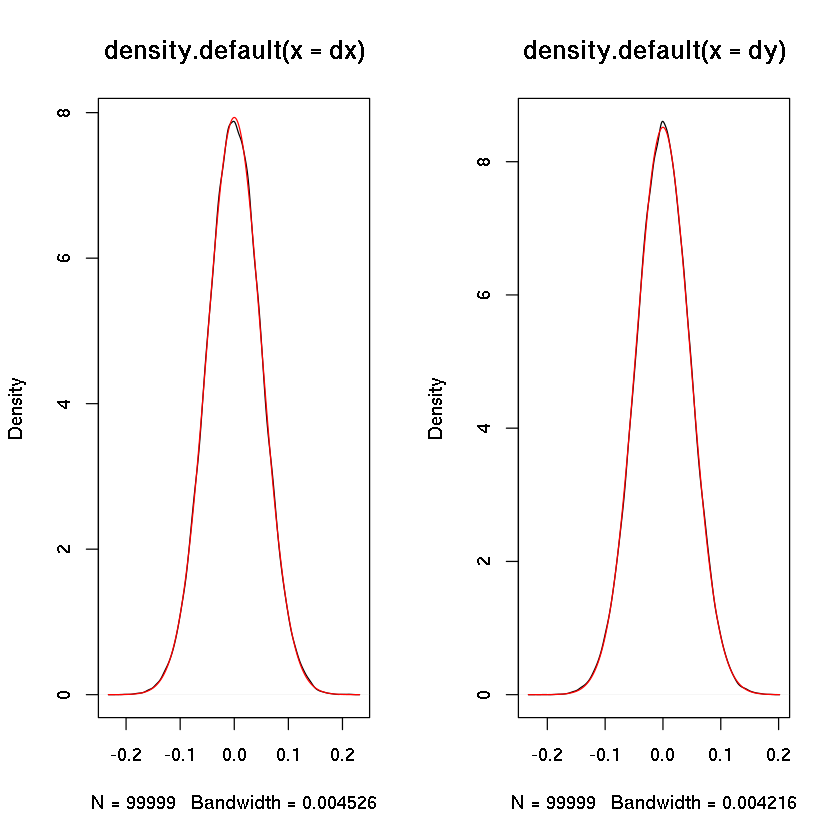

In [14]:
#hist(dx)
#hist(dy)
dnsdx = density(dx)
dnsdy = density(dy)

plot(dnsdx)
lines(dnsdx$x,dnorm(dnsdx$x,mean = mean(dx),sd = sd(dx)),col='red')
plot(dnsdy)
lines(dnsdy$x,dnorm(dnsdy$x,mean = mean(dx),sd = sd(dy)),col='red')

In [11]:
ks.test((dx-mean(dx))/sd(dx),pnorm)
ties(dx)
ks.test((dy-mean(dy))/sd(dy),pnorm)
ties(dy)
samples = 5000+1:5000
shapiro.test((dx[samples]-mean(dx[samples]))/sd(dx[samples]))
shapiro.test((dy[samples]-mean(dy[samples]))/sd(dy[samples]))

Warning message:
In ks.test((dx - mean(dx))/sd(dx), pnorm): ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  (dx - mean(dx))/sd(dx)
D = 0.0049975, p-value = 0.01354
alternative hypothesis: two-sided


[1] 0.9886399

Warning message:
In ks.test((dy - mean(dy))/sd(dy), pnorm): ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  (dy - mean(dy))/sd(dy)
D = 0.0062148, p-value = 0.0008836
alternative hypothesis: two-sided


[1] 0.9933599


	Shapiro-Wilk normality test

data:  (dx[samples] - mean(dx[samples]))/sd(dx[samples])
W = 0.99961, p-value = 0.4316



	Shapiro-Wilk normality test

data:  (dy[samples] - mean(dy[samples]))/sd(dy[samples])
W = 0.99938, p-value = 0.08524


In [12]:
cor(dx,coords[1:length(coords[,1])-1,1])
cor(dy,coords[1:length(coords[,2])-1,2])
cor(coords[,1],coords[,2])
cor(dx,dy)

[1] -0.1069227

[1] -0.1101266

[1] 0.02173264

[1] -0.001846543